In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data_path = "/content/gdrive/My Drive/machine learning SKR/projects/face recognition/dlib/Data"

In [20]:
!pip install face_recognition

In [0]:
from PIL import Image
import face_recognition
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import os

In [0]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file(data_path+'/training/akshay/1.jpg')

In [24]:
face_locations = face_recognition.face_locations(image)
face_locations

[(118, 563, 341, 340)]

A face is located at pixel location Top: 118, Left: 340, Bottom: 341, Right: 563


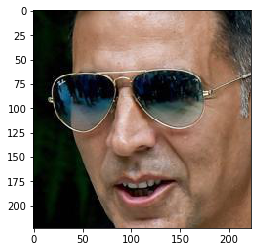

In [25]:
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    
    plt.imshow(face_image)

In [0]:
# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []
faces = []
# Training directory
train_dir = os.listdir(data_path+'/training/')

In [0]:
# Loop through each person in the training directory
for person in train_dir:
    pix = os.listdir(data_path+"/training/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file(data_path+"/training/" + person + "/" + person_img)
        face_bounding_boxes = face_recognition.face_locations(face)
        faces.append(face)
        #If training image contains none or more than faces, print an error message and exit
        if len(face_bounding_boxes) != 1:
            print(person + "/" + person_img + " contains none or more than one faces and can't be used for training.")
            exit()
        else:
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)

In [28]:
len(faces)

20

In [0]:
# plt.subplots(4, 5)
# plt.figure(figsize=(20, 20))
# for i in range(20):
#   plt.subplot(4, 5, i+1)
#   plt.imshow(faces[i])
#   plt.xlabel(names[i])

In [0]:
from sklearn import svm

In [36]:
# Create and train the SVC classifier
clf = svm.SVC()
clf.fit(encodings,names)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# The training data would be all the face encodings from all the known images and the labels are their names
test_encodings = []
test_faces = []
# Training directory
test_dir = os.listdir(data_path+'/test/')


for person_img in test_dir:
    # Get the face encodings for the face in each image file
    face = face_recognition.load_image_file(data_path+"/test/" + person_img)
    face_bounding_boxes = face_recognition.face_locations(face)
    test_faces.append(face)
    #If training image contains none or more than faces, print an error message and exit
    if len(face_bounding_boxes) != 1:
        print(person + "/" + person_img + " contains none or more than one faces and can't be used for training.")
        exit()
    else:
        face_enc = face_recognition.face_encodings(face)[0]
        # Add face encoding for current image with corresponding label (name) to the training data
        test_encodings.append(face_enc)

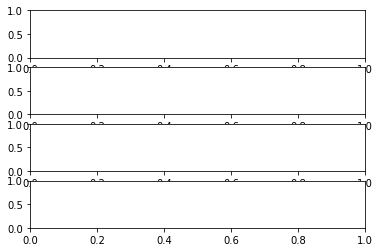

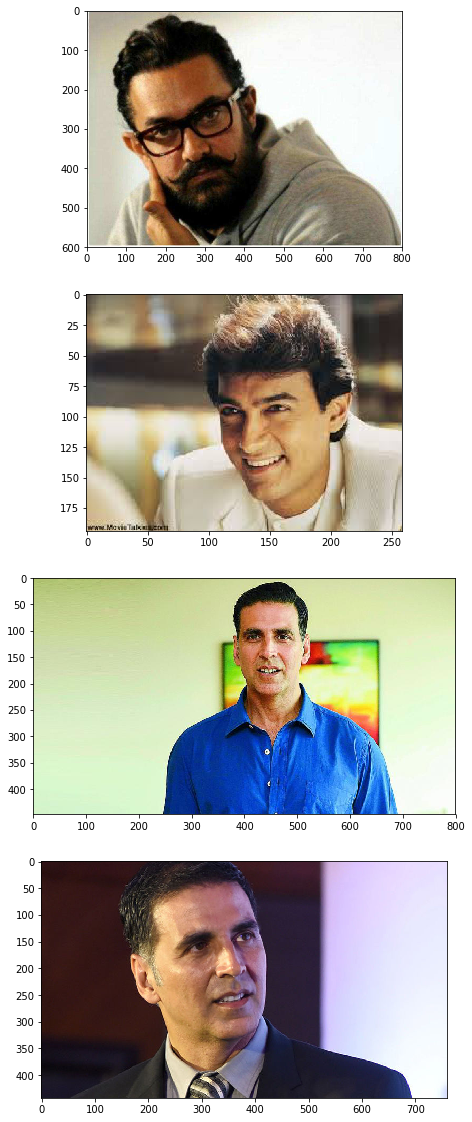

In [35]:
plt.subplots(4, 1)
plt.figure(figsize=(20, 20))
for i in range(4):
  plt.subplot(4, 1, i+1)
  plt.imshow(test_faces[i])

In [37]:
for i in range(len(test_encodings)):
    name = clf.predict([test_encodings[i]])
    print(*name)

amir
amir
akshay
akshay
